<a href="https://colab.research.google.com/github/tabraiz-1768/AIML-2025/blob/main/Lab08_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2303a51768 Tabraiz Khan Lab 08


### 1. Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

### 2 - Loading the data

In [ ]:
car_data = fetch_openml(name='car', version=2, parser='auto')

In [ ]:
type("car_data")

str

In [ ]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


# Exploratory Analysis
**Splitting Data into Training and Test sets**

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.3,random_state=20)
print('the Size of training data is :{}\n The size of testing data is : {}'.format(len(train_data),len(test_data)))

the Size of training data is :1209
 The size of testing data is : 519


In [ ]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [ ]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [ ]:
train_data['buying'].value_counts()

,count
buying,
med,327
high,307
vhigh,291
low,284


In [ ]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


In [ ]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


In [ ]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


In [ ]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
big,411
med,405
small,393


In [ ]:
train_data['safety'].value_counts()

,count
safety,
med,406
low,402
high,401


<Axes: xlabel='buying', ylabel='count'>

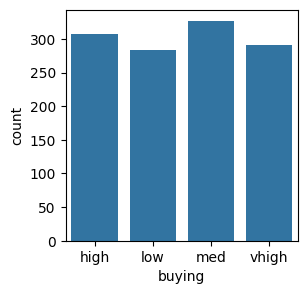

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x="buying")

<Axes: xlabel='maint', ylabel='count'>

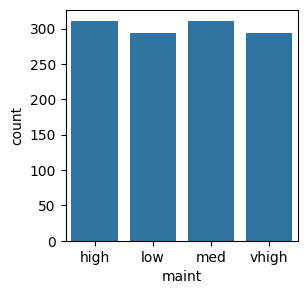

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x="maint")

<Axes: xlabel='doors', ylabel='count'>

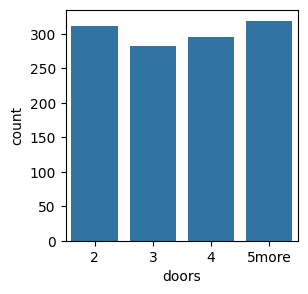

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x="doors")

<Axes: xlabel='persons', ylabel='count'>

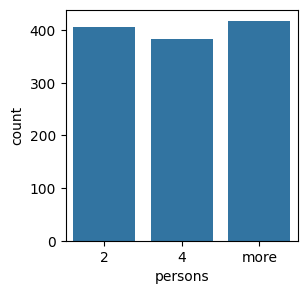

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x="persons")

<Axes: xlabel='lug_boot', ylabel='count'>

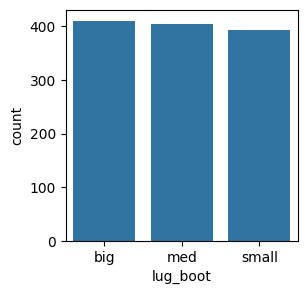

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x="lug_boot")

<Axes: xlabel='safety', ylabel='count'>

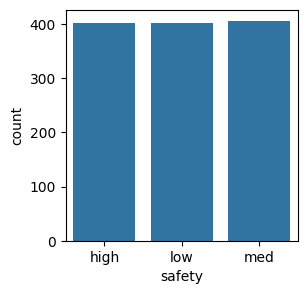

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x="safety")

<Axes: xlabel='buying', ylabel='count'>

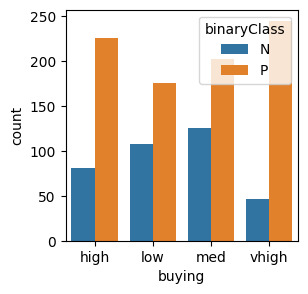

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x='buying',hue='binaryClass')

<Axes: xlabel='maint', ylabel='count'>

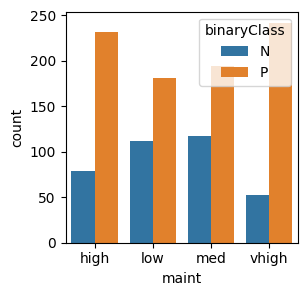

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x='maint',hue='binaryClass')

<Axes: xlabel='doors', ylabel='count'>

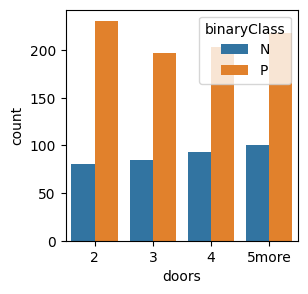

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x='doors',hue='binaryClass')

<Axes: xlabel='persons', ylabel='count'>

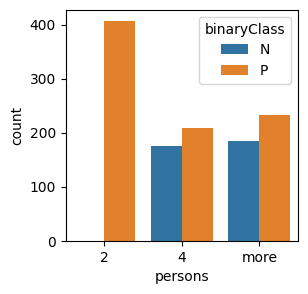

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x='persons',hue='binaryClass')

<Axes: xlabel='lug_boot', ylabel='count'>

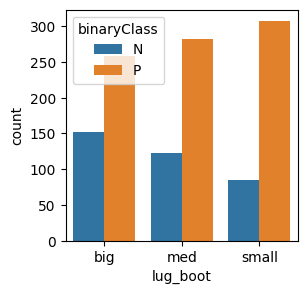

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x='lug_boot',hue='binaryClass')

<Axes: xlabel='safety', ylabel='count'>

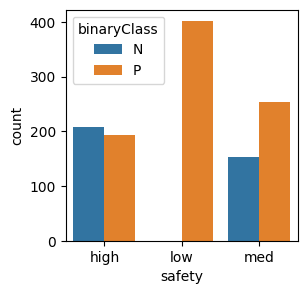

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=train_data,x='safety',hue='binaryClass')

# Data Preprocessing

In [ ]:
ct=train_data.drop('binaryClass',axis=1)
cl=train_data[['binaryClass']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
p=Pipeline([('ord_enc',OrdinalEncoder())])
ct_prepared=p.fit_transform(ct)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
cl_prepared=label_enc.fit_transform(cl)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Training Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier()
tc.fit(ct_prepared,cl_prepared)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree

text_representation = tree.export_text(tc)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   | 

### Evaluating Decision Trees

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred =tc.predict(ct_prepared)
cm = confusion_matrix(cl_prepared,pred)
acc= accuracy_score(cl_prepared,pred)
print(cm)
print(acc)

report = classification_report(cl_prepared,pred)
print(report)

[[360   0]
 [  0 849]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

